In [1]:
import json
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.size'] = 6
plt.rcParams['font.family'] = 'arial'

In [2]:
template_counts = np.bincount(np.load('../../data/processed/bkms-train.labels.classes.npy'))
bincount = np.bincount(template_counts)
augmented_popularity = np.bincount(sparse.load_npz('../../data/processed/bkms-test.appl_matrix.npz').sum(axis=0).A.reshape(-1))


baseline_prefix='../../data/model_analysis/bkms-baseline'
pretrained_prefix='../../data/model_analysis/bkms-pretrained'


In [3]:
evaluation = {}

In [4]:
evaluation['acc'] = {}

In [5]:
evaluation['acc']['baseline'] = pd.read_json(baseline_prefix+'.accuracy.json')
evaluation['acc']['pretrained'] = pd.read_json(pretrained_prefix+'.accuracy.json')

In [6]:
pretrained_prefix+'.appl_precision.json'

'../../data/model_analysis/bkms-pretrained.appl_precision.json'

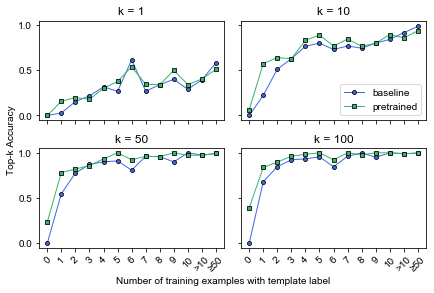

In [22]:
x = list(range(0,11))
fig, ax = plt.subplots(2, 2, figsize=(6,4), sharex=True, sharey=True,)
x_ind = x+[r'>10', '≥50']
df_ind = list(map(str, x))+['med', 'high']
#top-1 
kwargs = {'markersize':4, 'markeredgecolor':'black', 'markeredgewidth':0.8, 'linewidth':1}

ax[0][0].plot(x_ind, evaluation['acc']['baseline'].loc[df_ind, 'top_1'].values, marker='o', label='baseline', color='royalblue', **kwargs)
ax[0][0].plot(x_ind, evaluation['acc']['pretrained'].loc[df_ind, 'top_1'].values, marker='s', label='pretrained', color='mediumseagreen', **kwargs)
ax[0][0].set_title('k = 1')

#top-10
ax[0][1].plot(x_ind, evaluation['acc']['baseline'].loc[df_ind, 'top_10'].values, marker='o', label='baseline', color='royalblue', **kwargs)
ax[0][1].plot(x_ind, evaluation['acc']['pretrained'].loc[df_ind, 'top_10'].values, marker='s', label='pretrained', color='mediumseagreen', **kwargs)
ax[0][1].set_title('k = 10')
ax[0][1].legend()

#top-50
ax[1][0].plot(x_ind, evaluation['acc']['baseline'].loc[df_ind, 'top_50'].values, marker='o', label='baseline', color='royalblue', **kwargs)
ax[1][0].plot(x_ind, evaluation['acc']['pretrained'].loc[df_ind, 'top_50'].values, marker='s', label='pretrained', color='mediumseagreen', **kwargs)
ax[1][0].set_title('k = 50')

#top-100
ax[1][1].plot(x_ind, evaluation['acc']['baseline'].loc[df_ind, 'top_100'].values, marker='o', label='baseline', color='royalblue', **kwargs)
ax[1][1].plot(x_ind, evaluation['acc']['pretrained'].loc[df_ind, 'top_100'].values, marker='s', label='pretrained', color='mediumseagreen', **kwargs)
ax[1][1].set_title('k = 100')

fig.text(0.5, 0, 'Number of training examples with template label', ha='center')
fig.text(0, 0.5, 'Top-k Accuracy', va='center', rotation='vertical')

plt.setp(ax[0][0].xaxis.get_majorticklabels(), rotation=45)

plt.setp(ax[1][1].xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax[1][0].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.savefig('../../figures/accuracy_vs_precedents.png',  bbox_inches="tight", dpi = 400)
plt.show()
